In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [165]:
LIST_OF_STAGE_II_COUNTRIES = pd.read_csv("../../../data/UN/fertility/countries_in_stage_II.csv")
TFR_OF_STAGE_II_COUNTRIES = pd.read_csv("../../../data/UN/fertility/TFR_per_country_stage_II.csv")

MC_SIMULATIONS_PREFIX = "./MC_fertility_"

REGION_OF_INTEREST = "Sudan"
TFR_OF_INTEREST = TFR_OF_STAGE_II_COUNTRIES[TFR_OF_STAGE_II_COUNTRIES["Region"] == REGION_OF_INTEREST]

MC_SIMULATIONS_FILE = MC_SIMULATIONS_PREFIX + REGION_OF_INTEREST + ".pkl"
with open(MC_SIMULATIONS_FILE, "rb") as handle:
    MC_SIMULATIONS = pickle.load(handle)

N_samples = len(MC_SIMULATIONS)
simulation_len = len(MC_SIMULATIONS[0].path) - 1
simulation_start = TFR_OF_INTEREST['Year'].iloc[-1]
simulation_end = simulation_start + simulation_len + 1
simulation_window = np.arange(simulation_start, simulation_end, 1)

MC_SIMULATIONS_path = [MC_SIMULATIONS[i].path for i in range(N_samples)]

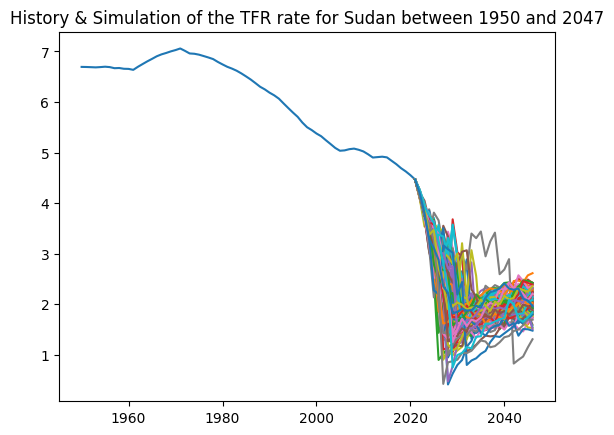

In [166]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
for path in MC_SIMULATIONS_path:
    plt.plot(simulation_window, path[:])
plt.title(
    f"History & Simulation of the TFR rate for {REGION_OF_INTEREST} between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.show()

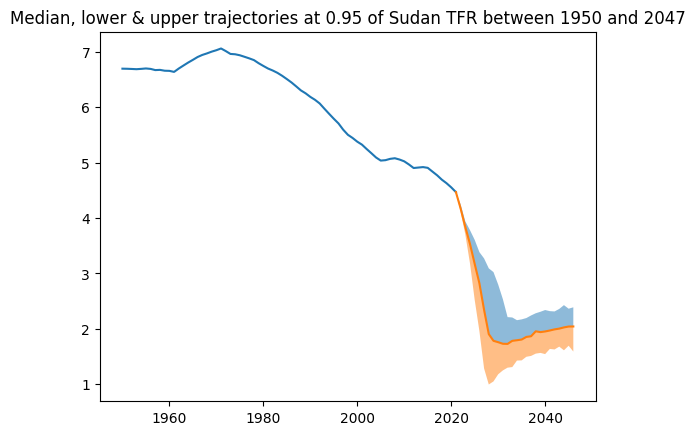

In [167]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
median_trajectory = np.median(MC_SIMULATIONS_path, axis=0)
upper_quantile_95 = np.quantile(MC_SIMULATIONS_path, 0.95, axis=0)
lower_quantile_005 = np.quantile(MC_SIMULATIONS_path, 0.05, axis=0)
plt.plot(simulation_window, median_trajectory)
plt.title(
    f"Median, lower & upper trajectories at 0.95 of {REGION_OF_INTEREST} TFR between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.fill_between(simulation_window, median_trajectory, upper_quantile_95, alpha=0.5)
plt.fill_between(simulation_window, median_trajectory, lower_quantile_005, alpha=0.5)
plt.show()

In [97]:
MC_SIMULATIONS_path

[array([2.89745   , 1.28272645, 1.28591959, 1.2864441 , 1.29458065,
        1.3094288 , 1.30201216, 1.29350453, 1.28008214, 1.28236241,
        1.2962957 , 1.2987186 , 1.31892865, 1.30618028, 1.3257324 ,
        1.33248484, 1.33293731, 1.33319767, 1.33028876, 1.33285303,
        1.32490272, 1.33225756, 1.32071365, 1.31602595, 1.30698471,
        1.3281295 ]),
 array([2.89745   , 0.87633976, 0.93872354, 0.90412509, 0.96997782,
        1.01035882, 1.06293383, 1.1490931 , 1.14313031, 1.13853022,
        1.17413455, 1.17626258, 1.14623849, 1.16001908, 1.16559925,
        1.20345043, 1.22970628, 1.23839322, 1.26154451, 1.2457042 ,
        1.24147789, 1.2235103 , 1.20287897, 1.20324725, 1.21904087,
        1.22646189]),
 array([2.89745   , 1.32188143, 1.30672497, 1.28847556, 1.29034245,
        1.27127207, 1.26647625, 1.26055752, 1.27495156, 1.27750328,
        1.29759582, 1.28880176, 1.29055365, 1.28742257, 1.26311679,
        1.25489956, 1.25113498, 1.26502044, 1.22734399, 1.20366556,
    

In [70]:
MC_SIMULATIONS[5].c1975

1.2114558354070266